In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from scipy import stats

In [4]:
df = pd.read_csv("50_Startups.csv")
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [6]:
df.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


In [7]:
df.isnull().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

In [8]:
df.drop(columns='State', inplace=True)
df.head()

,R&D Spend,Administration,Marketing Spend,Profit
0,165349.20,136897.80,471784.10,192261.83
1,162597.70,151377.59,443898.53,191792.06
2,153441.51,101145.55,407934.54,191050.39
3,144372.41,118671.85,383199.62,182901.99
4,142107.34,91391.77,366168.42,166187.94


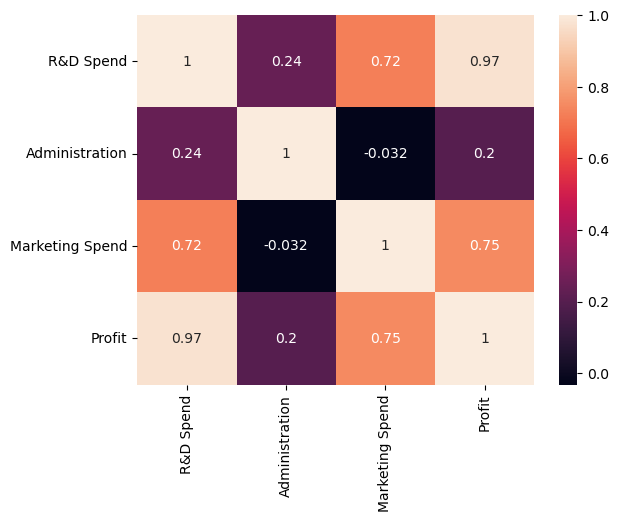

In [9]:
sns.heatmap(df.corr(), annot=True)
plt.show()

In [10]:
df.drop(columns='Administration', inplace=True)

In [11]:
df.head()

,R&D Spend,Marketing Spend,Profit
0,165349.20,471784.10,192261.83
1,162597.70,443898.53,191792.06
2,153441.51,407934.54,191050.39
3,144372.41,383199.62,182901.99
4,142107.34,366168.42,166187.94


<Axes: >

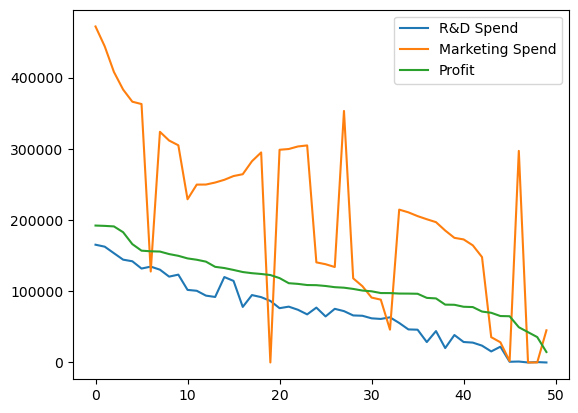

In [12]:
df.plot()

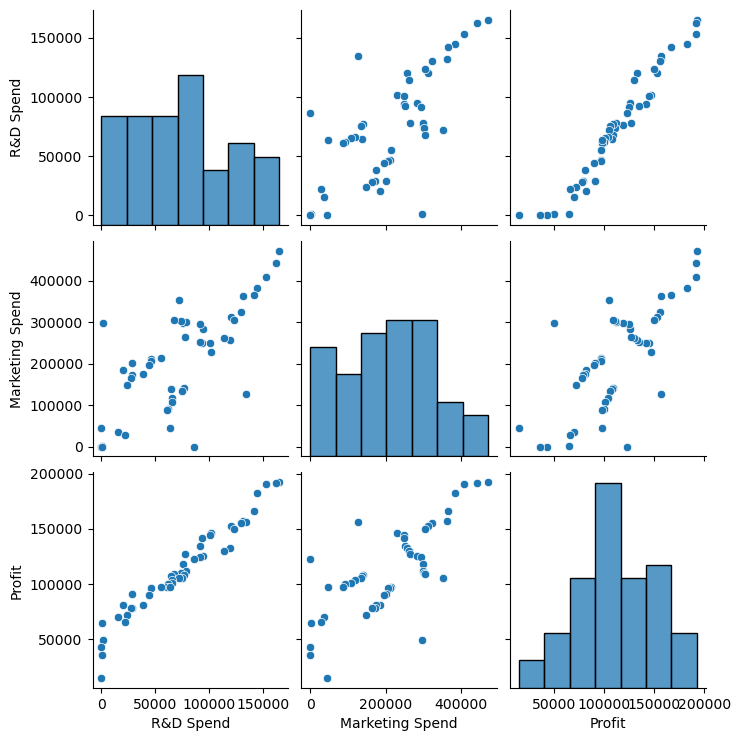

In [20]:
sns.pairplot(df)

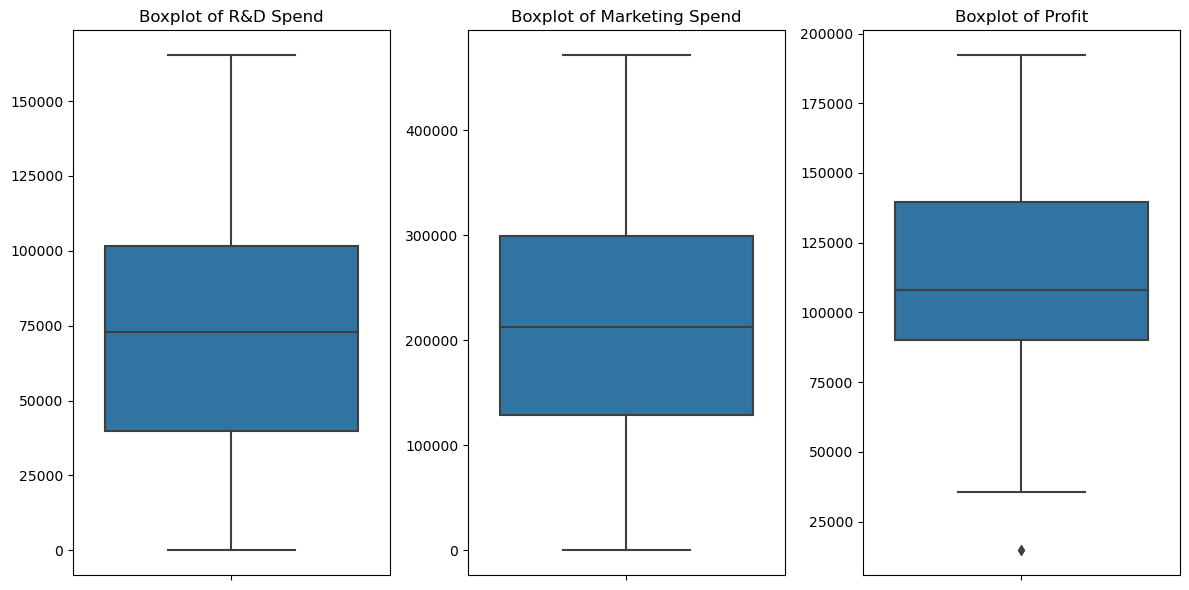

In [21]:
plt.figure(figsize=(12, 6))
  
# Loop through each column and create a boxplot
for column in df.columns:
    plt.subplot(1, len(df.columns), list(df.columns).index(column) + 1)
    sns.boxplot(y=df[column], orient='vertical')
    plt.title(f'Boxplot of {column}')
    plt.ylabel('')
    
plt.tight_layout()
plt.show()

In [102]:
for i in df.columns:
    print({i:df[i].unique()})

{'R&D Spend': array([165349.2 , 162597.7 , 153441.51, 144372.41, 142107.34, 131876.9 ,
       134615.46, 130298.13, 120542.52, 123334.88, 101913.08, 100671.96,
        93863.75,  91992.39, 119943.24, 114523.61,  78013.11,  94657.16,
        91749.16,  86419.7 ,  76253.86,  78389.47,  73994.56,  67532.53,
        77044.01,  64664.71,  75328.87,  72107.6 ,  66051.52,  65605.48,
        61994.48,  61136.38,  63408.86,  55493.95,  46426.07,  46014.02,
        28663.76,  44069.95,  20229.59,  38558.51,  28754.33,  27892.92,
        23640.93,  15505.73,  22177.74,   1000.23,   1315.46,      0.  ,
          542.05])}
{'Marketing Spend': array([471784.1 , 443898.53, 407934.54, 383199.62, 366168.42, 362861.36,
       127716.82, 323876.68, 311613.29, 304981.62, 229160.95, 249744.55,
       249839.44, 252664.93, 256512.92, 261776.23, 264346.06, 282574.31,
       294919.57,      0.  , 298664.47, 299737.29, 303319.26, 304768.73,
       140574.81, 137962.62, 134050.07, 353183.81, 118148.2 , 107138.3

In [103]:
df_log = np.log(df)

c:\Users\amalp\anaconda3\Lib\site-packages\pandas\core\internals\blocks.py:351: RuntimeWarning: divide by zero encountered in log
  result = func(self.values, **kwargs)


In [104]:
df_log.dtypes

R&D Spend          float64
Marketing Spend    float64
Profit             float64
dtype: object

In [105]:
df_log.replace([np.inf, -np.inf], np.nan, inplace=True)
df_log.dropna(axis=0, inplace=True)

In [106]:
df_sqrt = np.sqrt(df)

In [107]:
df_sqrt.dtypes

R&D Spend          float64
Marketing Spend    float64
Profit             float64
dtype: object

In [108]:
df_sqrt = df_sqrt.replace(0.0, np.nan).dropna(axis=0)
df_sqrt.dropna(axis=0, inplace=True)

In [109]:
X = df[['R&D Spend', 'Marketing Spend']]
Y = df[['Profit']]

X_log = df_log[['R&D Spend', 'Marketing Spend']]
Y_log = df_log[['Profit']]

X_sqrt = df_sqrt[['R&D Spend', 'Marketing Spend']]
Y_sqrt = df_sqrt[['Profit']]

In [110]:
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=10)
x_train_log, x_test_log, y_train_log, y_test_log = train_test_split(X_log, Y_log, test_size=0.2, random_state=10)
x_train_sqrt, x_test_sqrt, y_train_sqrt, y_test_sqrt = train_test_split(X_sqrt, Y_sqrt, test_size=0.2, random_state=10)

In [111]:
model = LinearRegression()
model_log = LinearRegression()
model_sqrt = LinearRegression()

In [112]:
model.fit(x_train,y_train)
model_log.fit(x_train_log,y_train_log)
model_sqrt.fit(x_train_sqrt,y_train_sqrt)

LinearRegression()

In [113]:
y_pred = model.predict(x_test)
y_pred_log = model_log.predict(x_test_log)
y_pred_sqrt = model_sqrt.predict(x_test_sqrt)

In [114]:
print("No Transformation Score : " , model.score(x_train,y_train)*100)
print("Log Transformation Score : " , model_log.score(x_train_log,y_train_log)*100)
print("sqrt Transformation Score : " , model_sqrt.score(x_train_sqrt,y_train_sqrt)*100)

No Transformation Score :  93.82176532996816
Log Transformation Score :  73.27236258679393
sqrt Transformation Score :  91.92317089316668


In [115]:
r2_df = pd.DataFrame(columns=['Transformation','r2_score'])
r2_df

,Transformation,r2_score


In [116]:
r2_org = r2_score(y_test,y_pred)
r2_sqrt = r2_score(y_test_sqrt,y_pred_sqrt)
r2_log = r2_score(y_test_log,y_pred_log)

new_records = [{'Transformation': 'No Transformation', 'r2_score': r2_org}, {'Transformation': 'SQRT Transformation', 'r2_score': r2_sqrt}, {'Transformation': 'Log Transformation', 'r2_score': r2_log}]

r2_df = r2_df.append(new_records, ignore_index=True)

C:\Users\amalp\AppData\Local\Temp\ipykernel_15076\1606592212.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  r2_df = r2_df.append(new_records, ignore_index=True)


In [117]:
r2_df

,Transformation,r2_score
0,No Transformation,0.990986
1,SQRT Transformation,0.937392
2,Log Transformation,0.726284
